# 1. Regresión Logística – low_popularity

Detectar si una canción no es popular (low_popularity = 1) 

Clasifica las canciones en dos grupos: populares (0) y no populares (1), según sus características musicales.

Accuracy del modelo: 0.86

 Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92     31373
           1       0.61      0.30      0.40      5682

    accuracy                           0.86     37055
   macro avg       0.75      0.63      0.66     37055
weighted avg       0.84      0.86      0.84     37055

Imagen guardada en: C:\Users\migue\Documents\GitHub\ML_Prediccion_Popularidad_Spotify\src\img\matriz_confusion_logistica.png


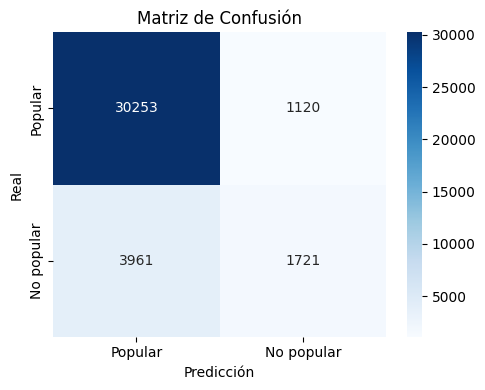

Modelo guardado en: C:\Users\migue\Documents\GitHub\ML_Prediccion_Popularidad_Spotify\src\models\modelo_logistica_low_popularity.pkl


In [1]:
# 1. Importar librerías necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Cargar la base de datos
file_path = r"C:\Users\migue\Documents\GitHub\ML_Prediccion_Popularidad_Spotify\src\data\tracks_limpio_con_low_popularity.csv"
df = pd.read_csv(file_path)

# 3. Definir features y target
features = [
    "danceability", "energy", "loudness", "speechiness",
    "acousticness", "instrumentalness", "valence", "tempo",
    "duration_ms", "explicit", "release_year"
]
target = "low_popularity"  # objetivo binario

X = df[features]
y = df[target]

# 4. Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Entrenar el modelo de clasificación
modelo_clasificacion = LogisticRegression(max_iter=1000)
modelo_clasificacion.fit(X_train, y_train)

# 6. Hacer predicciones y evaluar
y_pred = modelo_clasificacion.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy del modelo: {accuracy:.2f}")

# Mostrar el reporte de clasificación
print("\n Classification Report:")
print(classification_report(y_test, y_pred))

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Popular", "No popular"], yticklabels=["Popular", "No popular"])
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.tight_layout()

# Guardar la imagen
img_path = r"C:\Users\migue\Documents\GitHub\ML_Prediccion_Popularidad_Spotify\src\img\matriz_confusion_logistica.png"
plt.savefig(img_path, dpi=300)
print(f"Imagen guardada en: {img_path}")
plt.show()

# 7. Guardar el modelo
modelo_path = r"C:\Users\migue\Documents\GitHub\ML_Prediccion_Popularidad_Spotify\src\models\modelo_logistica_low_popularity.pkl"
joblib.dump(modelo_clasificacion, modelo_path)
print(f"Modelo guardado en: {modelo_path}")
